### Voy a probar con diferentes tipos de Clustering Techniques 
Se trata de un método de aprendizaje no supervisado (unsupervised), ya que el proceso no tiene en cuenta a qué grupo pertenece realmente cada observación (si es que existe tal información). Esta característica es la que diferencia al clustering de las métodos de clasificación en el que sí emplea la verdadera clasificación durante su entrenamiento.

Dada la utilidad del clustering en disciplinas muy distintas (genómica, marketing...), se han desarrollado multitud de variantes y adaptaciones de sus métodos y algoritmos. Pueden diferenciarse tres grupos principales:

- Partitioning Clustering:\
Este tipo de algoritmos requieren que el usuario especifique de antemano el número de clusters que se van a crear (K-means, K-medoids, CLARA).

- Hierarchical Clustering:\
Este tipo de algoritmos no requieren que el usuario especifique de antemano el número de clusters. (agglomerative clustering, divisive clustering).

- Métodos que combinan o modifican los anteriores:\
Hierarchical K-means, fuzzy clustering, model based clustering y density based clustering.

In [1]:
#Librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn packages
# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df_train = pd.read_csv(r"C:\Users\Usuario\Documents\Entrega_ML\data\raw\Health_index1.csv")
df_train.rename(columns={'Oxigen': 'O2', 'Nitrogen':'N2','Hydrogen':'H2', 'Methane':'CH4', 'Acethylene':'C2H2', 'Ethylene':'C2H4', 'Ethane':'C2H6'}, inplace=True)
# df_train = data.copy()

df_train['R1'] = df_train['CH4'] / df_train['H2']
df_train['R2'] = df_train['C2H2'] / df_train['C2H4']
df_train['R3'] = df_train['C2H2'] / df_train['CH4']
df_train['R4'] = df_train['C2H6'] / df_train['C2H2']
df_train['R5'] = df_train['C2H4'] / df_train['C2H6']
df_train['R6'] = (df_train['CO2'] / df_train['CO'])

df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.replace(np.nan, 0, inplace=True)

# df_train['R1'] = df_train['R1'].astype(int)
# df_train['R2'] = df_train['R2'].astype(int)
# df_train['R3'] = df_train['R3'].astype(int)
# df_train['R4'] = df_train['R4'].astype(int)
df_train['Life expectation'] = df_train['Life expectation'].astype(int)
df_train['Life expectation'] = df_train['Life expectation'].astype(int)

In [2]:
df_train.iloc[45]

H2                        211.000000
O2                     249900.000000
N2                      62600.000000
CH4                       148.000000
CO                        118.000000
CO2                      2300.000000
C2H4                      751.000000
C2H6                      103.000000
C2H2                     3030.000000
DBDS                        0.000000
Power factor                1.000000
Interfacial V              45.000000
Dielectric rigidity        41.000000
Water content               9.000000
Health index               50.600000
Life expectation           29.000000
R1                          0.701422
R2                          4.034621
R3                         20.472973
R4                          0.033993
R5                          7.291262
R6                         19.491525
Name: 45, dtype: float64

In [3]:
df_train.drop([45],axis=0, inplace=True)

In [ ]:
#Save a copy Dataframe.
data = df_train.copy()

In [4]:
X = df_train[['H2', 'O2', 'N2', 'CH4', 'CO', 'CO2', 'C2H4', 'C2H6', 'C2H2', 'DBDS', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Life expectation', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'Health index']]
# X = data[['Health index', 'Life expectation']]

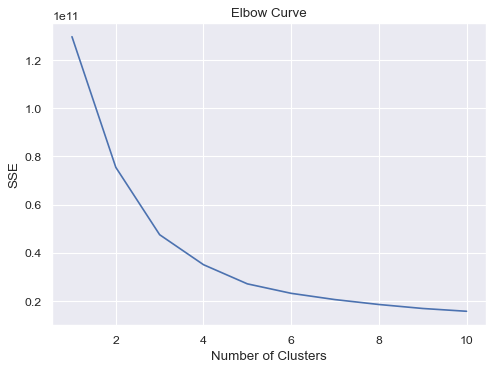

In [5]:
sns.set_theme()
def elbow_method(X):
    #elbow method
    wcss = []
    for i in range(1,11):
        k_means = KMeans(n_clusters=i,init='k-means++', random_state=45)
        k_means.fit(X)
        wcss.append(k_means.inertia_)

    plt.figure(figsize=(7,5), dpi=80)
    #plot elbow curve
    plt.plot(np.arange(1,11),wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Curve')

    plt.savefig('plot_elbow_curve.png', orientation = 'horizontal', dpi=300);
    plt.show()

elbow_method(X)

In [6]:
k = 4
pt_kmeans = KMeans(n_clusters=k, random_state=45)
y_pred = pt_kmeans.fit_predict(X)

In [7]:
y_pred

array([1, 1, 0, 1, 3, 1, 1, 0, 2, 0, 0, 0, 2, 1, 3, 1, 3, 3, 0, 3, 0, 3,
       2, 2, 2, 2, 2, 3, 2, 0, 1, 2, 1, 1, 3, 1, 1, 0, 3, 2, 2, 1, 3, 3,
       0, 0, 0, 0, 3, 3, 1, 2, 3, 2, 1, 1, 1, 3, 2, 2, 0, 2, 2, 3, 3, 0,
       3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 0, 0, 1, 2, 0, 0, 0, 3, 0,
       0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       3, 3, 1, 0, 0, 3, 2, 1, 3, 1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 1, 3, 1,
       1, 3, 1, 2, 0, 3, 2, 0, 3, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 3, 3, 0, 3, 3, 3, 1, 3, 1,
       0, 1, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 0,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 0, 2, 3, 1, 2, 3,
       0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 0, 1, 2, 1,

In [8]:
df_train['Clustering'] = y_pred

### PCA 

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=22))
pca_pipe.fit(data)

modelo_pca = pca_pipe['pca']

In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data = modelo_pca.components_,
    columns = data.columns,
    index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']
)

In [ ]:
modelo_pca.explained_variance_ratio_

In [ ]:
modelo_pca.explained_variance_ratio_.cumsum()

### MIX KMEANS & PCA

In [ ]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 9

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

plt.figure(figsize=(15, 15))
plt.subplot(4, 2, 1) 
sns.scatterplot(x='PC1', y='PC2', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 2)
sns.scatterplot(x='PC1', y='PC3', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 3)
sns.scatterplot(x='PC1', y='PC4', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 4)
sns.scatterplot(x='PC1', y='PC5', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 5)
sns.scatterplot(x='PC1', y='PC6', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 6)
sns.scatterplot(x='PC1', y='PC7', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 7)
sns.scatterplot(x='PC1', y='PC8', hue=data['clusters'], data=results, palette='colorblind')
plt.subplot(4, 2, 8)
sns.scatterplot(x='PC1', y='PC9', hue=data['clusters'], data=results, palette='colorblind')

plt.title('K-means Clustering with 4 dimensions')
plt.show();

### Describing our customers

In [10]:
# df_train[df_train['Clustering'] == 0]
df = df_train['Clustering'].value_counts()

In [11]:
df

3    184
0    131
1     90
2     64
Name: Clustering, dtype: int64

In [ ]:
df_train[df_train['Clustering'] == 2]

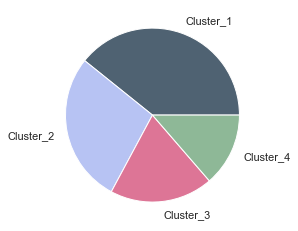

In [12]:
# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
names  = ['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']
# values = df_train['Clustering']
# Use it thanks to the color argument
plt.pie(df, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);

In [ ]:
'''Análisis del los grupos generados a partir del clustering generado'''

df1 = df_train[df_train['Clustering'] == 0]
df1.describe()

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
sns.kdeplot(data=df1, x="Water content")
sns.kdeplot(data=df1, x="Life expectation")
sns.kdeplot(data=df1, x="Health index")

In [ ]:
X = data[['H2', 'O2', 'N2', 'CH4', 'CO', 'CO2', 'C2H4', 'C2H6', 'C2H2', 'DBDS',
    'Power factor', 'Interfacial V', 'Dielectric rigidity', 'Water content', 'Health index', 'Life expectation']]

scaler = StandardScaler()
scaler.fit(X)
data_std = scaler.transform(X)

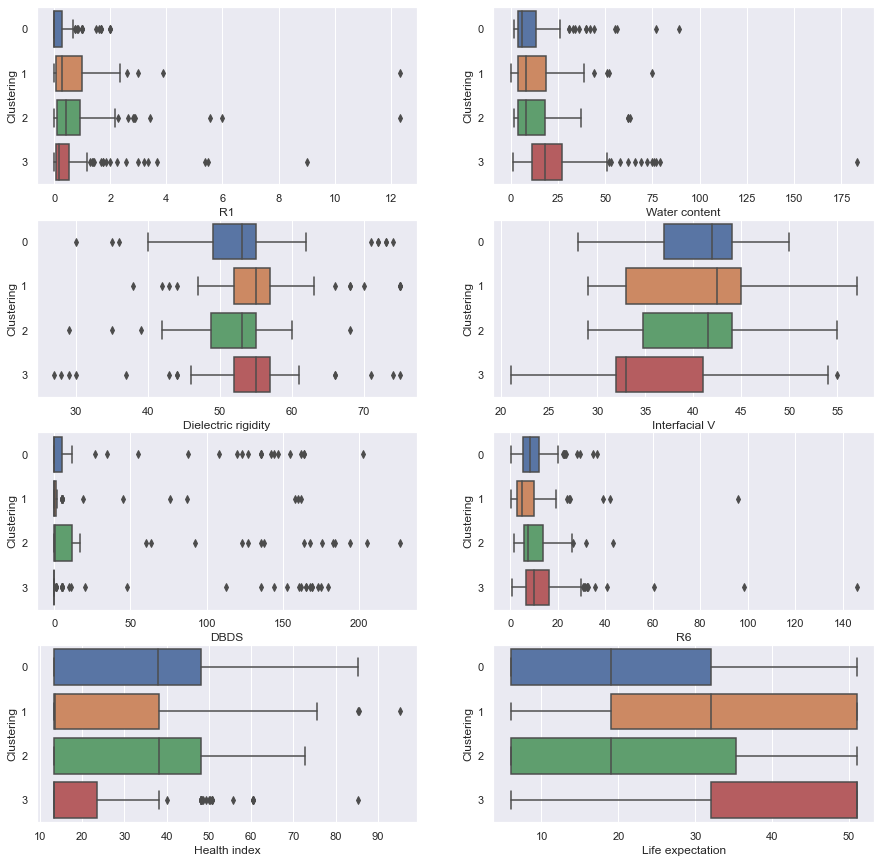

<Figure size 432x288 with 0 Axes>

In [27]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

plt.figure(figsize=(15, 15))
plt.subplot(4, 2, 1) 
sns.boxplot(y=df_train["Clustering"], x=df_train['R1'], orient='h')
plt.subplot(4, 2, 2)
sns.boxplot(y=df_train["Clustering"], x=df_train['Water content'], orient='h')
plt.subplot(4, 2, 3)
sns.boxplot(y=df_train["Clustering"], x=df_train['Dielectric rigidity'], orient='h')
plt.subplot(4, 2, 4)
sns.boxplot(y=df_train["Clustering"], x=df_train['Interfacial V'], orient='h')
plt.subplot(4, 2, 5)
sns.boxplot(y=df_train["Clustering"], x=df_train['DBDS'], orient='h')
plt.subplot(4, 2, 6)
sns.boxplot(y=df_train["Clustering"], x=df_train['R6'], orient='h')
plt.subplot(4, 2, 7)
sns.boxplot(y=df_train["Clustering"], x=df_train['Health index'], orient='h')
plt.subplot(4, 2, 8)
sns.boxplot(y=df_train["Clustering"], x=df_train["Life expectation"], orient='h')

plt.show()
plt.tight_layout()
plt.savefig('multiple_boxplot.png', orientation = 'landscape', dpi=199);

In [ ]:
df2 = data[data['Clustering'] == 1]
df2.describe()

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
sns.kdeplot(data=df2, x="Water content")
sns.kdeplot(data=df2, x="Life expectation")
sns.kdeplot(data=df2, x="Health index")

In [ ]:
df3 = data[data['Clustering'] == 2]
df3.describe()

In [ ]:
plt.figure(figsize=(8,5))
plt.style.use("fivethirtyeight")
sns.kdeplot(data=df3, x="Water content")
sns.kdeplot(data=df3, x="Life expectation")
sns.kdeplot(data=df3, x="Health index")

In [ ]:
# dfHI['Health index'] = dfHI['Health_index_1']
# dfHI['Health index'] = dfHI['Health_index_2']

# for n, m in enumerate(dfHI['Health_index_1']):
#     if m <= 50:
#         dfHI['Health index'][n] = 'Recondition'
#     elif m <= 50:
#         dfHI['Health index'][n] = 'Refurbish'
#     else:
#         dfHI['Health index'][n] = 'Replace

In [15]:
len(df_train.columns)

23

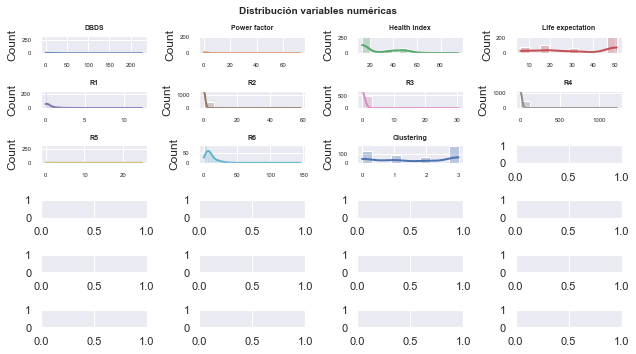

In [16]:
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_train.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_train,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
'''
# Gráfico de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold") 
'''